# Анализ результатов A/B-теста

## Изучение и предобработка данных

### Откроем файлы и изучим их содержимое

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект 3\hypothesis.csv')
    orders = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект 3\orders.csv')
    visitors = pd.read_csv('D:\Файлы с ноута\! Аналитик данных (Яндекс)\МОДУЛЬ 2\Проект 3\visitors.csv')

pd.set_option('display.max_colwidth', None)
display(hypothesis.head(10))
display(orders.head(10))
display(visitors.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [3]:
# приведем названия колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [4]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В датасетах нет пропусков. Но есть несоответствие типов данных - в таблицах *orders* и *visitors* столбцы *date* хранятся с типом *object*. Приведем эти столбцы к нужному типу и виду.

In [5]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [6]:
# проверка на наличие явных дубликатов
hypothesis.duplicated().sum()

0

In [7]:
orders.duplicated().sum()

0

In [8]:
visitors.duplicated().sum()

0

В датасетах нет явных дубликатов.

### Изучим данные о заказах

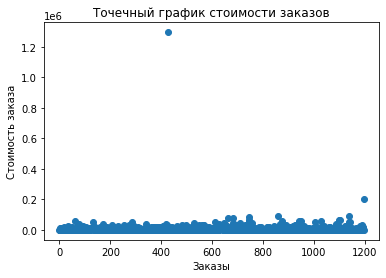

In [9]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов');

In [10]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [11]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов стоили дороже 28 000 рублей и не более 1% были дороже 58 233 рублей. Максимальная сумма заказа превышает 1,2 млн рублей.

### Проверим наличие пользователей, попавших в обе тестовые группы

In [12]:
users_A = orders.query('group == "A"') # здесь заменила orders_new на orders, так что поиск ID идет по исходным данным
users_B = orders.query('group == "B"')
users_AB = users_A.merge(users_B, on='visitorId')['visitorId'].unique()
display(len(users_AB))
display(len(orders['visitorId'].unique()))

58

1031

58 пользователей попали в обе тестовые группы, это 5,6% всех уникальных пользователей. Наличие таких пользователей противоречит правилам проведения A/B-теста, поэтому их следует удалить.

In [13]:
orders_new = orders[~orders['visitorId'].isin(users_AB)]
orders_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [14]:
display(len(orders_new['visitorId'].unique()))

973

## Приоритизация гипотез

В файле *hypothesis* хранятся данные о девяти гипотезах по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Приоритезируем имеющиеся гипотезы с помощью фреймворков ICE и RICE.

In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.format({'ICE':"{:.2f}"})

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [16]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**:

Согласно ICE наиболее высокий приоритет у гипотез 8, 0 и 7. В соответствии с RICE приоритетными гипотезами являются 7, 2, 0 и 6 (последние две набрали одинаковое колличество баллов). А вот гипотеза 8 по RICE получила только пятую строчку. Всё из-за добавившегося в расчет параметра Reach (охват пользователей) - охват гипотезы 8 оценили всего в 1 балл, в то всемя, как гипотеза 7 охватывает всех пользователей интернет-магазина.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам

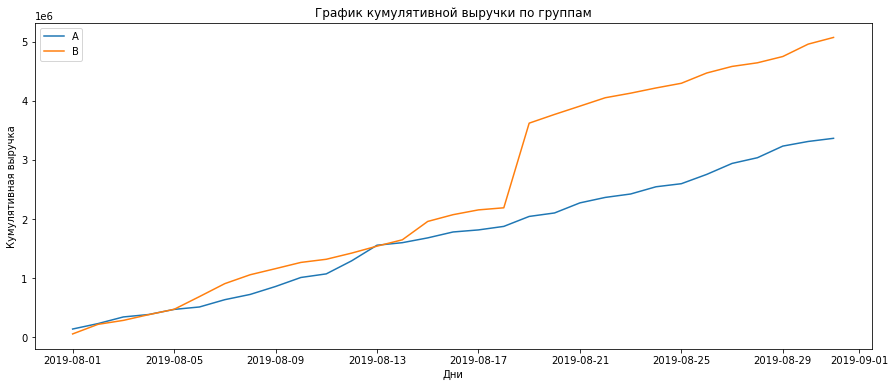

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_new[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_new[
        np.logical_and(
            orders_new['date'] <= x['date'], orders_new['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (15, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дни')
plt.ylabel('Кумулятивная выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend();

Группа В вырвалась вперед еще в начале теста. Где-то в районе 18 августа виден резкий скачок объема накопленной выручки группы В. Возможно, в этот день был сделан большой заказ, который позволил группе В так сильно обогнать группу А.

### Построим график кумулятивного среднего чека по группам

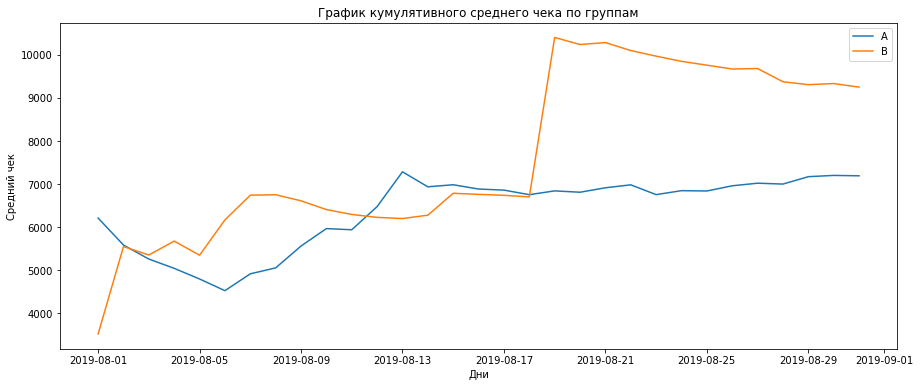

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.figure(figsize = (15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Средний чек колебался до середины - вперед выходила то группа А, то группа В. Но после 17 августа средний чек группы В резко вырос до 10 тыс рублей, в то время как у группы А стабилизировался на уровне 7 тыс рублей.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

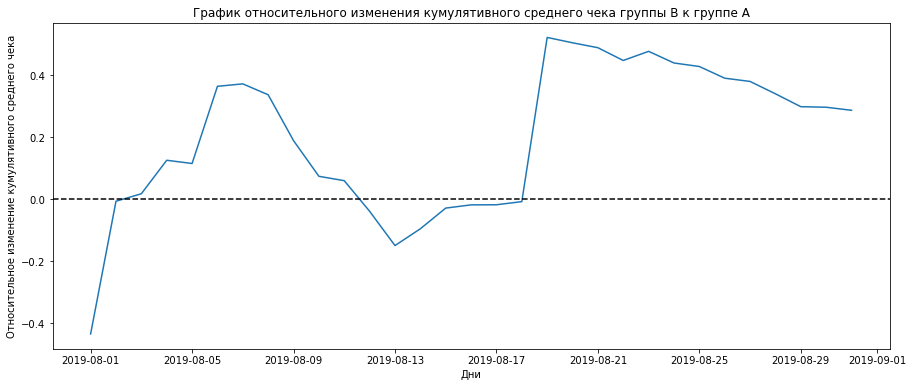

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дни')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

В нескольких точках график различия между сегментами резко скачет. Видимо в результатах теста есть аномалии, которые сильно сказываются на графиках.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

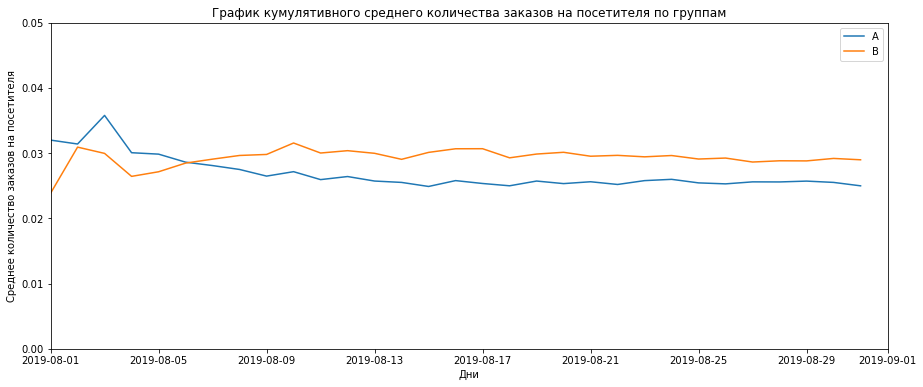

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (15, 6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дни')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

В отличии от графиков выручки и среднего чека, график среднего количества заказов в расчете на пользователя не имее резких всплесков и обе группы стабилизировались ещё в начале теста. В начале теста группа А имела большую конверсию, но постепенно группа В вырвалалась вперед и стабилизировалась на уровне 3%. Конверсия группы А опустилась ниже этого уровня.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

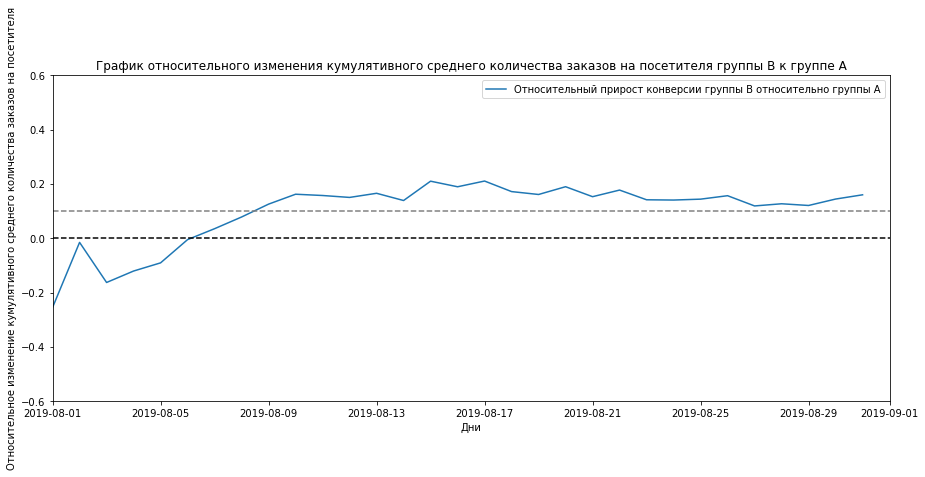

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дни')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.6, 0.6]);

Почти с самого начала теста конверсия группы В превышала конверсию группы А. К середине теста разница достигла 20%, затем пошла на спад, но к концу теста снова обозначилась тенденция к росту.

### Построим точечный график количества заказов по пользователям

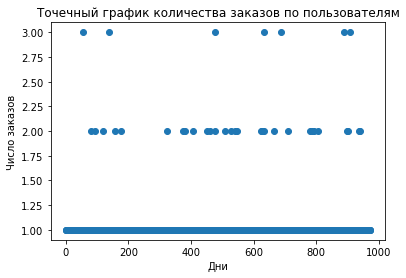

In [22]:
ordersByUsers = (
    orders_new.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Дни')
plt.ylabel('Число заказов')
plt.title('Точечный график количества заказов по пользователям');

Большинство пользователей делает 1 заказ, реже 2 и совсем редко 3 заказа.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей совершает 2 и более заказов. Разумно выбрать 2 заказа на одного пользователя в качестве верхней границы числа заказов.

### Построим точечный график стоимости заказов

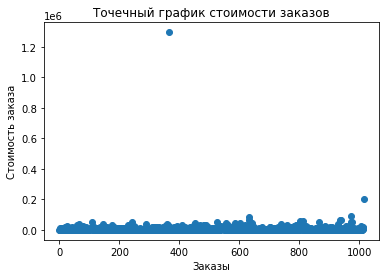

In [24]:
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов');

Максимальная сумма заказа превышает 1,2 млн рублей - это явная аномалия, которую следует исключить. Согласно графику такое значение всего одно. Так же на графике виден ещё один выброс на уровне 200 тыс рублей, его так же следует исключить. Удалим эти заказы и построим на новый график.

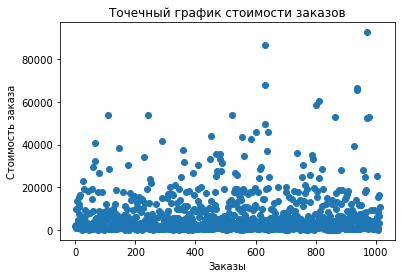

In [25]:
# отсекаем аномальные значения и записываем результат в новую переменнуючтобы не потерять сырые данные
cut_data = orders_new.query('revenue < 200000')
# строим график по новым данным
x_values = pd.Series(range(0, len(cut_data['revenue'])))
plt.scatter(x_values, cut_data['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов');

После удаления аномалий график стал нагляднее. Теперь видно, что стоимость основной массы заказов редко превышает 20 тыс рублей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [26]:
np.percentile(cut_data['revenue'], [90, 95, 99])

array([17990., 26550., 52900.])

Не более 5% заказов стоили дороже 26 550 рублей и не более 1% были дороже 52 900 рублей. 

В качестве верхней границы стоимости заказа можно принять сумму в 30 000 рублей. Так мы сможем убрать от 1% до 5% пользователей с дорогими заказами.

###	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным (без удаления аномальных пользователей)

Сформулируем гипотезы: 
    
    Нулевая: различий в среднем количестве заказов между группами нет. 
    Альтернативная: различия в среднем между группами есть.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_new[orders_new['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_new[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders_new[orders_new['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-значение: ', '{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост: ', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-значение:  0.00002
Относительный прирост:  0.160


p-value получился существенно ниже 5%, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показал, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост конверсии в группе В к конверсии группы А составил 16%.

###	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

    Нулевая гипотеза: различий в среднем чеке между группами нет. 
    Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
print('p-значение: ', '{0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]))
print('Относительный прирост: ', '{0:.3f}'.format(orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1))

p-значение:  0.829
Относительный прирост:  0.287


p-value существенно выше 5% - статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B на 28,7% выше среднего чека группы A.

###	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным

Сначала очистим данные. Сделаем срезы пользователей с числом заказов больше 2 и пользователей, совершивших заказы дороже 30 000. Посмотрим, сколько всего аномальных пользователей.

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.info())

<class 'pandas.core.series.Series'>
Int64Index: 58 entries, 1099 to 580
Series name: None
Non-Null Count  Dtype
--------------  -----
58 non-null     int64
dtypes: int64(1)
memory usage: 928.0 bytes


None

Нашлось 58 пользователей, сделавших аномальные по количеству и стоимости заказы. Это составляет около 6% от числа уникальных пользователей, оставшихся после предобработки.

Теперь проверим гипотезы на "очищенных" данных:

    Нулевая: различий в среднем количестве заказов между группами нет. 
    Альтернативная: различия в среднем между группами есть.

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('p-значение: ', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительный прирост: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.00004
Относительный прирост:  0.316


Как и в случае с "сырыми" данными, статистическая значимость достигнута. Относительный прирост среднего количества заказов группы В к конверсии группы А по "очищенным" данным составил 31,6% вместо 16% по "сырым" данным.

###	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

    Нулевая гипотеза: различий в среднем чеке между группами нет. 
    Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [31]:
print('p-значение: ', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_new[
                np.logical_and(
                    orders_new['group'] == 'A',
                    np.logical_not(orders_new['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_new[
                np.logical_and(
                    orders_new['group'] == 'B',
                    np.logical_not(orders_new['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост: ', 
    "{0:.3f}".format(
        orders_new[
            np.logical_and(
                orders_new['group'] == 'B',
                np.logical_not(orders_new['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_new[
            np.logical_and(
                orders_new['group'] == 'A',
                np.logical_not(orders_new['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.741
Относительный прирост:  -0.027


р-value снизился почти на 10%, но статистически значимых отличий в среднем чеке между группами не появилось. Разница между группами сократилась в 10 раз и даже стала отрицательной. Если по "сырым" данным средний чек группы В был *на 28,7% выше*, чем у группы А, то на "очищенных" данных этот же показатель угрппы В стал *на 2,7% ниже*, чем у группы А.

## Выводы

**Приоритезация гипотез:**

- Согласно **ICE** наиболее высокий приоритет у гипотез **8** (Запустить акцию, дающую скидку на товар в день рождения), **0** (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и **7** (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).
- В соответствии с **RICE** приоритетными гипотезами являются **7** (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), **2** (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), **0** (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и **6** (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию).


**Анализ результатов А/В-теста:**

- Существует статистически значимое различие по конверсии между группами А и В. После фильтрации аномалий относительный прирост конверсии в группе В относительно группы А достиг 31,6%.
- Нет статистически значимого различия по среднему чеку между группами. При этом после фильтрации аномалий средний чек группы B стал ниже среднего чека группы A всего на 2,7%, хотя по "сырым" данным был на 28,7% выше .
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
- **А/В-тест следует остановить и зафиксировать победу группы В**.